In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
reviews = pd.read_csv("fandango_score_comparison.csv")

In [3]:
cols= ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

norm_reviews = reviews[cols]
print(norm_reviews[:1])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0        3.9                   4.5             5.0  


These site use different scales for ratings. SOme use a 5 star scale while others use a 100 point scale. In addition. Metacritic and Rotten Tomatoes aggregate score from both users and film critics, while IMDB and Fandango aggregate only from their users. we will focus on just the average scores from users, because not all of the sites have score from critics.

The RT_user_norm, Metacritic_user_nom, IMDB_norm, and Fandango_Ratingvalue columns contains the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. While using average isn't perfect because films with a few reviews can skew the average rating.

Let's create a vertical bar plot in matplotlib that represents the different user scores for Avengers: Age of Ultron (2015)

In [4]:
import matplotlib.pyplot as plt
from numpy import arange  # the np.arange() function returns evenly spaced values. we use arange() to generate the positions of the left side of our bars. 

num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_xticklabels(num_cols)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

<Figure size 640x480 with 1 Axes>

Let's create a horizontal bar plot for the data above

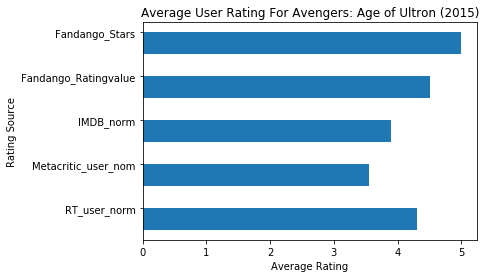

In [5]:
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax= plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

Let's create a scatter plot that visualize teh relationship between the Fandango_Ratingvalue and RT_user_norm columns

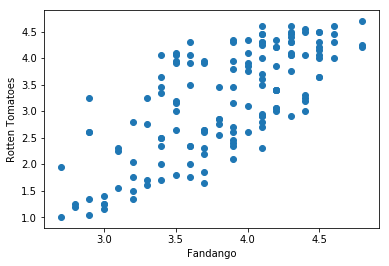

In [6]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

The scatter plot suggest that there's weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple correponding y values. The correlation is positive because, in general, as x increase, y also increases.

we are not exploring if the ratings from Fandango influence those on Rotten Tomatoes and we are inctead looking to understand how much they agree. Let's see what happens when we flip the columns



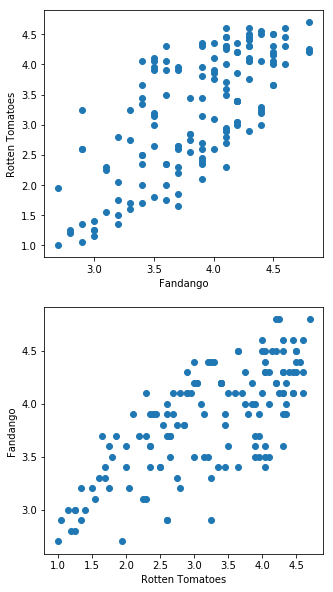

In [7]:
fig= plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


#generate a scatter plot with the Fandango_Ratingvalue and RT_user_norm

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

From above we can see that the second scatter plot is a mirror reflection of the first scatter plot.

Let's generate scatter plots to see how Fandango ratings correlate with all 3 of the other review sites


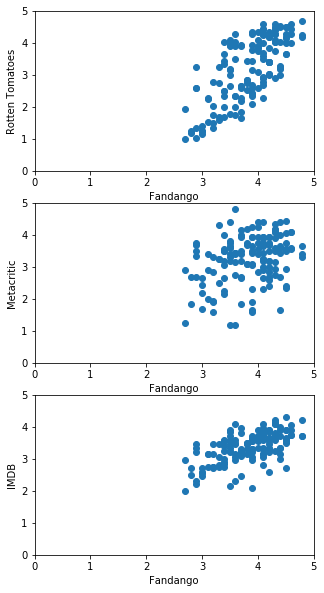

In [8]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()


In [9]:
#comparing the frequency distribution of user rating from fandango with those from IMDB 
fandango_distribution =reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fandango_distribution.sort_index()

imdb_distribution = reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


Let's generate histogram for all four column

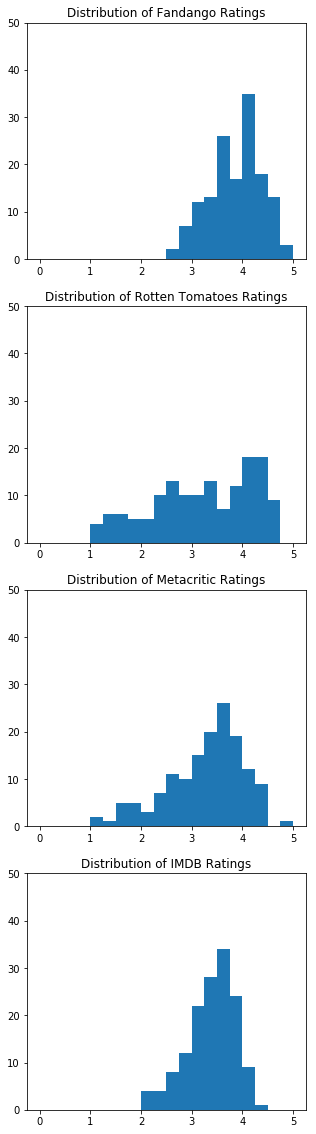

In [10]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins= 20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

plt.show()

Let's generate a box plot consists of box and whisker diagram of the values in the RT_user_norm column

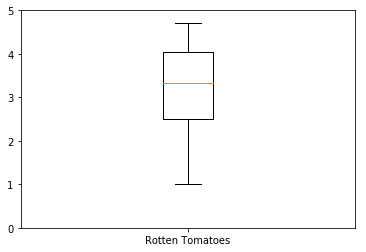

In [11]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0,5)
ax.set_xticklabels(['Rotten Tomatoes'])

plt.show()
    

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

* The bottom 25% of user ratings range from around 1 to 2.5
* The top 25% of user ratings range from around 4 to 4.6


Let's compare the lower and upper ranges with those for the other columns

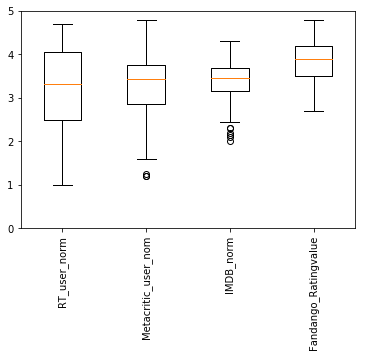

In [12]:
num_cols=['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()

From the boxplot, we can reach the following conslusion:
* user ratings from Rotten Tomatoes and Metacritics span a larger range of values
* user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values

we can noticed there are outliers from both Metacritic and IMDB